# Big Data  분석(II) 일일 과제물

##### A2_노소은

### <분석목표 : FAT를 예측하기 위한 파생변수(BMI 등)를  생성하여 회귀분석을 실시하고 결과를 해석>

##### --------------------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------

### 패키지 

In [43]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy.stats

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "NanumGothic"

##### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### 1. 데이터 속성 및 기술 통계량 확인

In [5]:
df_bmi=pd.read_csv("C:/Users/소은/Desktop/Academy/빅데이터/Big Data 분석/체질검사.csv", engine="python")
df_bmi.head()    #데이터의 모양을 확인한다.

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [34]:
# BMI 열 추가
# BMI = 몸무게/키의 제곱
# BMI 계산 시, WEIGHT 단위는 pound(1lb->0.45kg), HEIGHT 단위는 inch(1inch->2.54cm)이므로 변환하여 사용
df_bmi['BMI']=(df_bmi['WEIGHT']*0.45)/((df_bmi['HEIGHT']*0.01*2.54)**2)
df_bmi.head() 

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165


### 1. 변수 간의 경향성 파악 - 그래프 분석

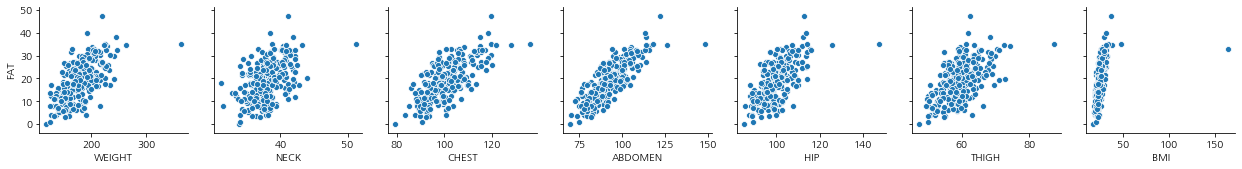

In [37]:
# 산점도 행렬
sns.pairplot(df_bmi, y_vars="FAT", x_vars=['WEIGHT','NECK','CHEST','ABDOMEN','HIP','THIGH','BMI'])

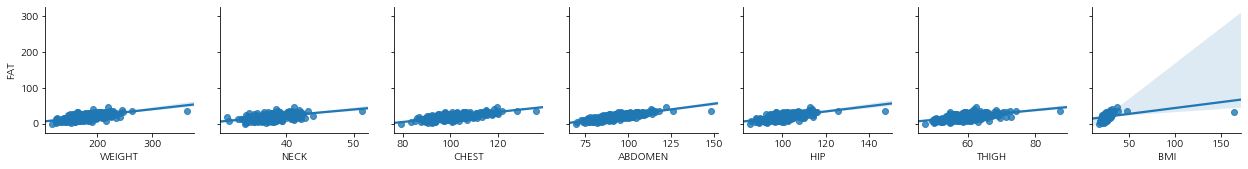

In [38]:
# 회귀 적합선 추가 -> 이상치는 관측되지 않았다.
sns.pairplot(df_bmi, y_vars="FAT", x_vars=['WEIGHT','NECK','CHEST','ABDOMEN','HIP','THIGH','BMI'], kind='reg')

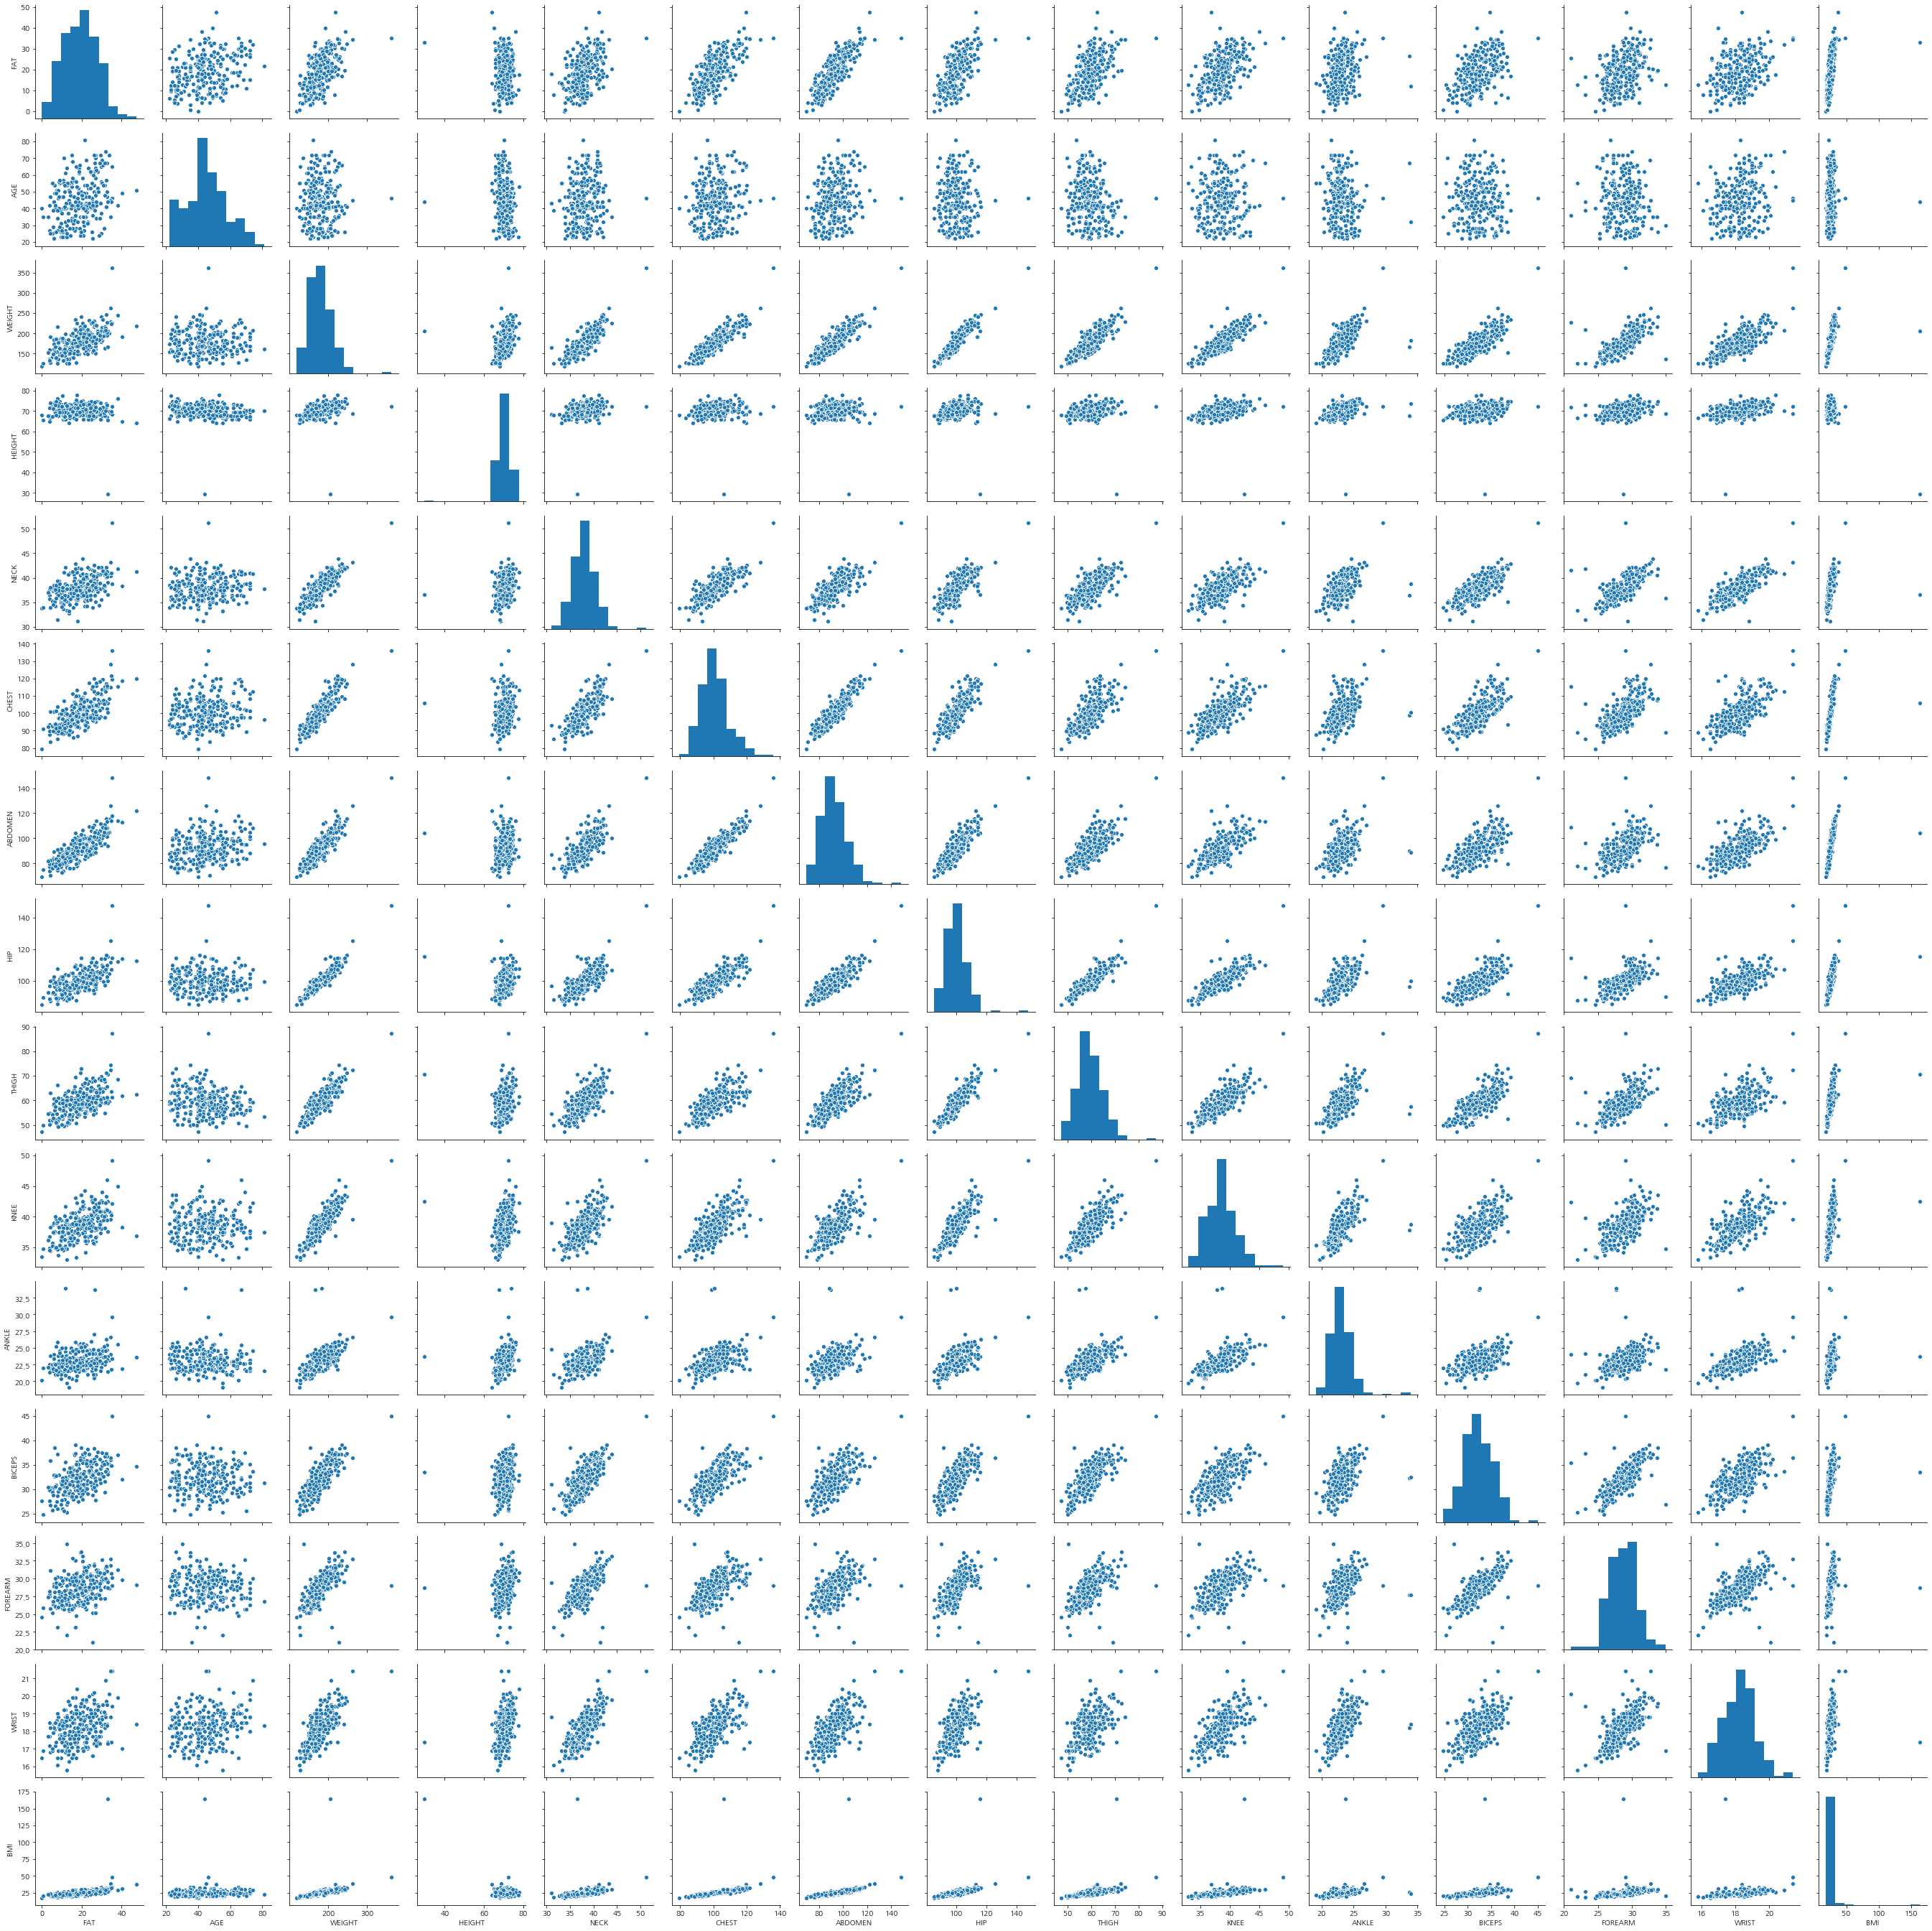

In [39]:
# 산점도 행렬 : 전체 숫자형 변수
sns.pairplot(df_bmi)

### 2. 변수 간의 경향성 파악 - 그래프 분석

In [41]:
#상관관계 분석
df_bmi.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347,0.371
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214,0.040
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730,0.391
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322,-0.638
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745,0.266
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660,0.383
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620,0.415
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630,0.462
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559,0.433
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665,0.364


- 체질 비만도(FAT)와 가슴 둘레(CHEST), 복부 둘레(ABDOMEN) 간의 높은 선형관계 확인
- 설명변수 상관관계 : 다수 설명변수 간의 선형관계 확인 -> 다중공선성 확인 및 처리 필요

### 3. 회귀 모델 생성 : 설명변수 전체

In [45]:
#선형 회귀분석: formula 이용. 상수항 자동 추가. 
reg_model = smf.ols(formula = '''FAT~AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI''',data = df_bmi)
#적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     50.56
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           5.49e-63
Time:                        02:25:37   Log-Likelihood:                -718.19
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     237   BIC:                             1519.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.2460     24.500     -0.990      0.3

- p값이 0.05보다 작으므로 회귀 모델로써 적합하다.
- 설명력 : 0.749
  -> 모델을 통하여 설명변수 EVAL을 74.9%로 설명할 수 있다.

In [48]:
# 설명 변수 간의 다중 공선성 확인
df_x = df_bmi.drop("FAT", axis = 1)

# 상수항 추가 함수 적용
df_x_const = add_constant(df_x)

#DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values, i)for i in range(df_x_const.shape[1])]

df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
10,ANKLE,1.922
12,FOREARM,2.196
1,AGE,2.251
13,WRIST,3.378
11,BICEPS,3.674
4,NECK,4.456
9,KNEE,4.815
14,BMI,7.432
8,THIGH,8.010
3,HEIGHT,9.146


In [50]:
# 다중 공선성이 높은 WEIGHT 변수제거 -> 다중공선성 문제 해결 후 공선성 재확인
df_x = df_bmi.drop(['FAT', 'WEIGHT'], axis = 1)
df_x_const = add_constant(df_x)
#DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values,i)for i in range(df_x_const.shape[1])]
#VIF 정렬
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
9,ANKLE,1.847
11,FOREARM,2.196
1,AGE,2.196
12,WRIST,3.327
10,BICEPS,3.507
3,NECK,3.962
2,HEIGHT,4.665
13,BMI,4.729
8,KNEE,4.788
7,THIGH,7.837


In [53]:
#선형 회귀 분석 -> WEIGHT 제외한 뒤의 다중공선성
reg_model = smf.ols(formula = '''FAT~AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI''',data = df_bmi)
#적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     53.97
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           2.29e-63
Time:                        02:30:25   Log-Likelihood:                -719.42
No. Observations:                 252   AIC:                             1467.
Df Residuals:                     238   BIC:                             1516.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6651      8.839      1.207      0.2

### 4. 후진제거법을 이용한 변수 선택

In [55]:
#RFE함수: 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
df_y = df_bmi['FAT']
#Sklearn의 선형회귀 모델
model = LinearRegression()
#전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_x, df_y)
#선택된 변수
selected_cols = df_x.columns[rfe.support_]
#제거된 변수
removed_cols = df_x.columns[~rfe.support_]

print('selected:', selected_cols)
print('removed:', removed_cols)

selected: Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
removed: Index(['AGE', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS', 'BMI'], dtype='object')


In [62]:
#회귀 모델 생성
rfe_reg_model = smf.ols(formula = 'FAT ~ NECK + NECK+ ABDOMEN+ FOREARM+ WRIST + HIP', data = df_bmi)
#적합
reg_result = rfe_reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           4.38e-68
Time:                        02:35:17   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

- p값이 유의수준 0.05보다 낮으므로 회귀모델로써 유의
- 설명력: 0.731

### 5. 결론 도출

In [60]:
#설명 변수 표준화 적용 -> 표준화 회귀계수 산출 목적
scaler = StandardScaler()
#Scala 변환 대상 변수 : 일반적으로 설명변수
cols = df_x.columns
#Scala 변환
np_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)
#목표 변수 추가
df_scaled["FAT"] = df_bmi['FAT']
reg_model_scaled = smf.ols(formula = "FAT~NECK+ HIP + NECK+ ABDOMEN+ FOREARM+ WRIST", data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           4.38e-68
Time:                        02:33:26   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.276     69.362      0.0

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


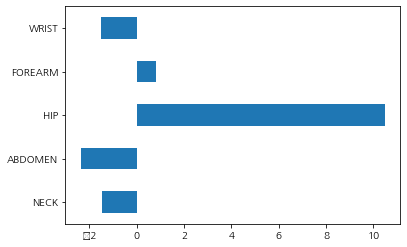

In [59]:
df_reg_coef = pd.DataFrame({"Coef":reg_result_scaled.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y = 'Coef', legend = False)

- 엉덩이가 클수록 FAT하다.